Import necessary libraries

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Load the dataset

In [72]:
titanic_data = pd.read_csv('titanic.csv')

Preprocess the data

In [73]:
# Preprocess the data
def preprocess_data(data):
    # Fill missing values without chained assignment
    data['Age'] = data['Age'].fillna(data['Age'].median())
    data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
    data['Fare'] = data['Fare'].fillna(data['Fare'].median())
    
    # Drop unnecessary columns
    data = data.drop(columns=['Cabin', 'Ticket', 'Name', 'PassengerId'])
    
    # Convert categorical features to numeric
    data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)
    
    return data


Preprocess the dataset

In [74]:
titanic_data = preprocess_data(titanic_data)

Define features and target variable

In [75]:
X = titanic_data.drop(columns=['Survived'])
y = titanic_data['Survived']

Split the data into training and testing sets

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train a logistic regression model

In [77]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Make predictions

In [78]:
y_pred = model.predict(X_test)

Evaluate the model

In [79]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 1.0
Confusion Matrix:
 [[50  0]
 [ 0 34]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



Create a bar graph visualization

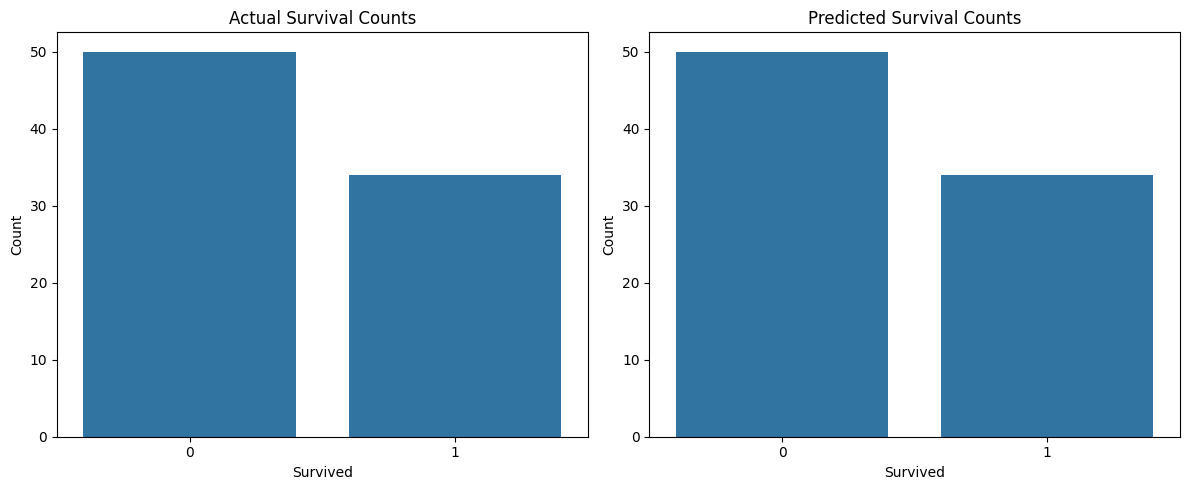

In [80]:
survival_counts = y_test.value_counts()
pred_counts = pd.Series(y_pred).value_counts()

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(x=y_test, ax=ax[0])
ax[0].set_title('Actual Survival Counts')
ax[0].set_xlabel('Survived')
ax[0].set_ylabel('Count')

sns.countplot(x=y_pred, ax=ax[1])
ax[1].set_title('Predicted Survival Counts')
ax[1].set_xlabel('Survived')
ax[1].set_ylabel('Count')

plt.tight_layout()
plt.show()
